
# Goal - To understand Feature Selection Technique (Feature Elimination) and compare the model quality.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
#================Background=======================================

#Dataset is collected from 50 starts up company from United States with their spending pattern.
# Startup company has different  spending pattern wrt R&D Spend,Administration spend,Marketing Spend. 
#The data also contains  profit margins for each locations(States). 
#The primary objective of this exercise is to identify the best features that can influence  the profit of the company 
# By identifying the best features a better model can be prepared for future predictions like: 
#How much of profit a company can expect by spending X amount of money? somthong like this.

# I have used below 4 techniques for feature selection
#      1.Correlation Analysis Technique
#      2.Recursive Feature Elimination Technique
#      3.Analysis of Variance(ANOVA) Technique
#      4.Select by model Technique
# The model score is evaluated for each technique and finally the technique which gives highest score is selected.  

In [ ]:
startupData = pd.read_csv(r'D:\SarojOfficeWork\AI\DataSet\50_Startups.csv')

# Method 1 -- Using Shortcut (Correlation Analysis)

In [4]:
startupData.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
finalDataset = pd.concat([pd.get_dummies(startupData.State), startupData.iloc[:,[0,1,2,4]]] ,axis = 1)
finalDataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [7]:
#Get the corr
finalDataset.corr()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


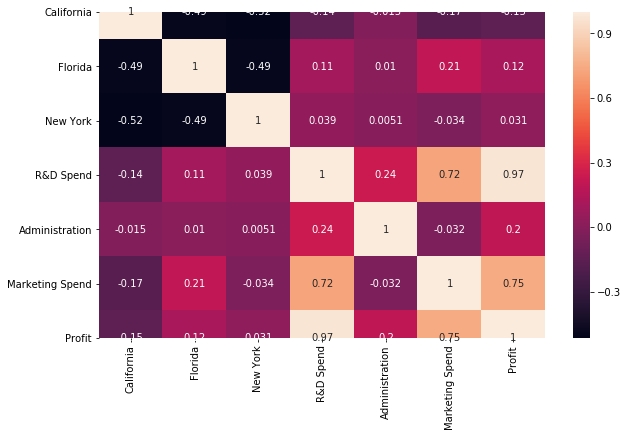

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(finalDataset.corr(),annot=True)

In [ ]:
#Threshold is ideally decided by Data Scientist
# Select those features who are greater than 50% corr !!! (Regression)
# For Classification, avoid using this technique. If you are forced, threshold must be 80% or more
#Conclusion: Based on Corr Analysis, R&D spend and Marketing Spend will be the best features to create the model. 
#Thus eliminate the remaining

In [9]:
#Seperate your data as features and label
features = startupData.iloc[:,[0,2]].values
label = startupData.iloc[:,[4]].values

In [10]:
#Create Train Test Split
# The way how we sample the data directly impacts the model's performance. 
#This is statistically proven hence using this as an optimization mechanis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(1,51):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=randomState)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    

Test Score: 0.9646437135748334 Training Score: 0.9423713608840597 Seed: 1
Test Score: 0.9814177491535382 Training Score: 0.9388772018080951 Seed: 2
Test Score: 0.9612876028942208 Training Score: 0.9459212470646745 Seed: 3
Test Score: 0.9674854200887459 Training Score: 0.9455331844858769 Seed: 4
Test Score: 0.9683604384024199 Training Score: 0.9436198878593198 Seed: 5
Test Score: 0.9909864896179557 Training Score: 0.9382176532996814 Seed: 10
Test Score: 0.9565036617363222 Training Score: 0.9472766838360558 Seed: 12
Test Score: 0.9499139926727364 Training Score: 0.9485793735881266 Seed: 13
Test Score: 0.97371375097723 Training Score: 0.9410506991241665 Seed: 14
Test Score: 0.9475480505951939 Training Score: 0.9471972623797911 Seed: 17
Test Score: 0.9658516680116018 Training Score: 0.9457936305980141 Seed: 21
Test Score: 0.9764404302143168 Training Score: 0.9421707561468369 Seed: 22
Test Score: 0.9692234650571673 Training Score: 0.94616489888384 Seed: 24
Test Score: 0.9613574909391511 Tra

In [ ]:
#Conclusion: Using R&D and Marketing spend gave a better model .THus this model can be a potential 
# candidate for deployment

# Method 2: Feature Selection using Recursive Feature Elimination (RFE)

In [11]:
# RFE can be applied only to the following algorithms
#
# 1. Algorithms that support coeff variables - Regression (LinearRegression, SVM, DecisionTreeRegression, RandomForestRegression)
# 2. Algorithms that support feature importance variable - Classification( DecisionTreeClassifier, RandomForestClassifier)

In [15]:
finalDataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [63]:
features=finalDataset.iloc[:,:-1].values
label=finalDataset.iloc[:,-1].values



In [38]:
featuresForRFE = finalDataset.iloc[:,:-1].values
labelForRFE = finalDataset.iloc[:,-1].values

In [13]:
#Steps to apply RFE:
# 1. Initialize the algo
# 2. Apply RFE on model
# 3. Get Features with High Rank

In [79]:
#1. Initialize the algo

from sklearn.linear_model import LinearRegression
modelForRFE = LinearRegression()

# 2. Apply RFE on model
from sklearn.feature_selection import RFE

#estimator contains the algorithm model object
# step defines how many features to be eliminated per iteration (Suggestion: Always select 1 feature per iteration (Backward Elimination algo))
# n_features_to_select defines how many features to select in first iteration. Default is 50% feature is selected if not specified.
selectFeaturesFromRFE = RFE(estimator= modelForRFE,n_features_to_select=3)

selectFeaturesFromRFE.fit(featuresForRFE,labelForRFE)

#3. Check Feature Ranks
print(finalDataset.columns)
print(selectFeaturesFromRFE.ranking_)
print(selectFeaturesFromRFE.support_)

Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'Profit'],
      dtype='object')
[1 1 1 2 3 4]
[ True  True  True False False False]


In [ ]:
#Conclusion from RFE -- RFE says the profit can be determined based on the location of the company

In [37]:
#Seperate your data as features and label
features = finalDataset.iloc[:,[0,1,2]].values
label = finalDataset.iloc[:,[6]].values

In [38]:
#Create Train Test Split

# The way how we sample the data directly impacts the model's performance. This is statistically proven hence using this as an optimization mechanis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(1,51):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=randomState)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    

Test Score: 0.07349615563557987 Training Score: -0.09884227717469309 Seed: 2
Test Score: 0.11996381245453902 Training Score: -0.05869774693841178 Seed: 6
Test Score: 0.015080875800281057 Training Score: 0.0017731552271403883 Seed: 32
Test Score: 0.12034523847134959 Training Score: -0.06199919496687656 Seed: 41
Test Score: 0.02532863096371374 Training Score: 0.013479770737339636 Seed: 49


In [ ]:
#Conclusion from PN(Data Scientist): The Observations derived from RFE doesnt satisfy the accuracy requirement. Thus rejected

# Method 3 - Univariate Analysis using ANOVA

In [81]:
finalDataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [111]:
featuresForANOVA = finalDataset.iloc[:,:-1].values
labelForANOVA = finalDataset.iloc[:,-1].values

In [109]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

selectFeaturesFromANOVA=SelectPercentile(percentile=50,score_func=f_regression) #Percentile here denotes % features to keep

selectFeaturesFromANOVA.fit(featuresForANOVA,labelForANOVA)

print(selectFeaturesFromANOVA.get_support())
print(selectFeaturesFromANOVA.pvalues_)

[False False False  True  True  True]
[3.12228656e-01 4.21447913e-01 8.28796347e-01 3.50032224e-32
 1.62217395e-01 4.38107318e-10]


In [110]:
from sklearn.feature_selection import  SelectPercentile
from sklearn.feature_selection import f_regression #This is for regression algo
#from sklearn.feature_selection import f_classif  #This is for classification algo

selectFeaturesFromANOVA = SelectPercentile(percentile=50, score_func=f_regression)#Percentile here denotes % features to keep

selectFeaturesFromANOVA.fit(featuresForANOVA,labelForANOVA)

print(finalDataset.columns)
print(selectFeaturesFromANOVA.get_support())
print(selectFeaturesFromANOVA.pvalues_)

Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'Profit'],
      dtype='object')
[False False False  True  True  True]
[3.12228656e-01 4.21447913e-01 8.28796347e-01 3.50032224e-32
 1.62217395e-01 4.38107318e-10]


In [23]:
#Conclusion from ANOVA -- Profit of the company completely depends on the spending pattern of your funds(R&D, Adm, Mark)

In [41]:
#Seperate your data as features and label
features = finalDataset.iloc[:,[3,4,5]].values
label = finalDataset.iloc[:,[6]].values

In [112]:
#Create Train Test Split

# The way how we sample the data directly impacts the model's performance. 
#This is statistically proven hence using this as an optimization mechanism
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(1,len(finalDataset)):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=randomState)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    

Test Score: 0.9649618042060478 Training Score: 0.9424465426893971 Seed: 1
Test Score: 0.9783259006626758 Training Score: 0.9398417195515446 Seed: 2
Test Score: 0.9560357304860769 Training Score: 0.9473848999820091 Seed: 4
Test Score: 0.966976302215851 Training Score: 0.943850522642993 Seed: 5
Test Score: 0.9901105113397227 Training Score: 0.9385918220043519 Seed: 10
Test Score: 0.9726607102793988 Training Score: 0.9411603359254431 Seed: 14
Test Score: 0.9633877651310373 Training Score: 0.946138584319559 Seed: 21
Test Score: 0.9757906394981452 Training Score: 0.9425908513252553 Seed: 22
Test Score: 0.9687727807395881 Training Score: 0.9464972114069966 Seed: 24
Test Score: 0.9602561948870695 Training Score: 0.9454518446256155 Seed: 26
Test Score: 0.9500997612784603 Training Score: 0.9482961316721963 Seed: 29
Test Score: 0.9539450076684566 Training Score: 0.9435367947390881 Seed: 31
Test Score: 0.9649795500576817 Training Score: 0.9343066184022641 Seed: 34
Test Score: 0.9571971950122541 T

In [ ]:
#Conclusion: Currently the optimized model for this usecase with random state 10

# Method 4 : Select Features by Algo (SelectByModel) 

In [113]:
finalDataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [114]:
featuresForModel = finalDataset.iloc[:,:-1].values
labelForModel = finalDataset.iloc[:,-1].values

In [116]:
# 1. Initialize the algo

from sklearn.linear_model import LinearRegression
modelForModel = LinearRegression()

# 2. Apply Select By Model

from sklearn.feature_selection import SelectFromModel
selectFeaturesFromModel = SelectFromModel(estimator=modelForModel)

selectFeaturesFromModel.fit(featuresForModel,labelForModel)


#Get the support
print(finalDataset.columns)
print(selectFeaturesFromModel.get_support())

Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'Profit'],
      dtype='object')
[ True  True  True False False False]


In [30]:
#Conclusion by SelectByModel - says the profit can be determined based on the location of the company

In [ ]:
# We already received the same reading in RFE . So REJECTED !!!

In [31]:
#Report Time :)

In [120]:
columns = ['AllIn', 'Correlation Analysis','RFE', 'ANOVA', 'SelectFroMModel']
AccuracyValues= [[0.9901105113397478,0.9909864896179557,0.039661078925242066,0.991745901723568,0.039661078925242066]]

df = pd.DataFrame(AccuracyValues,columns=columns)
df


,AllIn,Correlation Analysis,RFE,ANOVA,SelectFroMModel
0,0.990111,0.990986,0.039661,0.991746,0.039661


In [ ]:
#Final Conclusion
#Use Anova Model !!!!